In [1]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R
#data = read_csv.read_csv(r"/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv") #MacOS
data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv") #Labor
#data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv") # PC

In [2]:
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
wavelength = scipy.constants.c/frequenz

In [3]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]

def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

def calculate_m(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(0,len(lambda_array)-1):
        m_array.append(lambda_array[i+1]/(lambda_array[i]-lambda_array[i+1]))
    return m_array

def calculate_m_looking_back(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(1,len(lambda_array)):
        m_array.append(lambda_array[i-1]/(lambda_array[i-1]-lambda_array[i]))
    return m_array

def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 

def sine(x,k,A,phi):
    return A*np.sin(k*x-phi)

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

def fit_individually(xlim_lower_value,xlim_upper_value,x_dataset,y_dataset, p0 = [1,1,1,1,1,1,1]):
    x_lim_lower = find_nearest(x_dataset,xlim_lower_value)
    x_lim_upper = find_nearest(x_dataset,xlim_upper_value)
    x_data_modified = x_dataset[x_lim_lower:x_lim_upper]
    y_data_modified = y_dataset[x_lim_lower:x_lim_upper]
    params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,x_data_modified,y_data_modified, p0 = p0)
    fitfunc = polynomial(x_data_modified,*params_fit)
    min_fit_index = scipy.signal.argrelmin(fitfunc, order = 500)
    min_fit_frequenz = x_data_modified[min_fit_index]
    min_fit_absorption = fitfunc[min_fit_index]
    plt.plot(x_data_modified,y_data_modified)
    plt.plot(min_fit_frequenz,min_fit_absorption, "ro")
    plt.plot(x_data_modified,fitfunc)
    return min_fit_frequenz, min_fit_absorption

In [4]:
cutdown = find_nearest(frequenz, 0.8e14)
cutup = find_nearest(frequenz, 2.0e14)
ends = 600
frequenz_20_cut = frequenz[cutdown:cutup]
frequenz_20_no_edge = frequenz[cutdown+ends:cutup-ends]
data_Lumilog_GaN_20 = data[4][::-1][cutdown:cutup]
data_Lumilog_GaN_20_no_edge = data_Lumilog_GaN_20[ends:-ends]
Lumilog_GaN_20_smooth, Lumilog_GaN_smoothed_out = flatten(data_Lumilog_GaN_20, N = 1200)
Lumilog_GaN_20_smooth_no_edge = Lumilog_GaN_20_smooth[ends:-ends]
Lumilog_GaN_smoothed_out_no_edge = Lumilog_GaN_smoothed_out[ends:-ends]

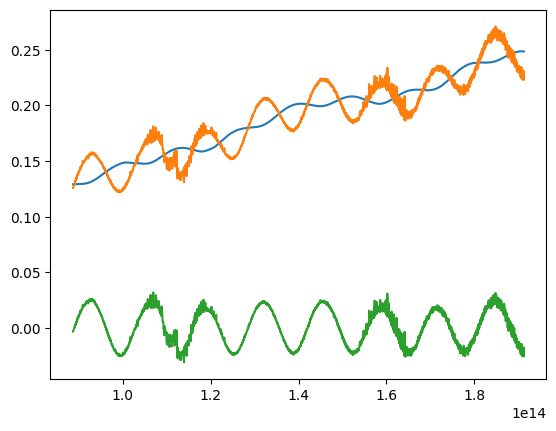

In [5]:
plt.plot(frequenz_20_no_edge, Lumilog_GaN_20_smooth_no_edge)
plt.plot(frequenz_20_no_edge, data_Lumilog_GaN_20_no_edge)
plt.plot(frequenz_20_no_edge, Lumilog_GaN_smoothed_out_no_edge)

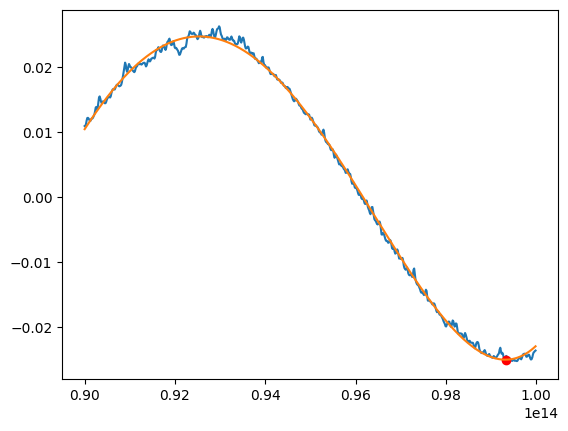

In [6]:
min_frequenz_first, min_absorption_first = fit_individually(0.9e14,1.0e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

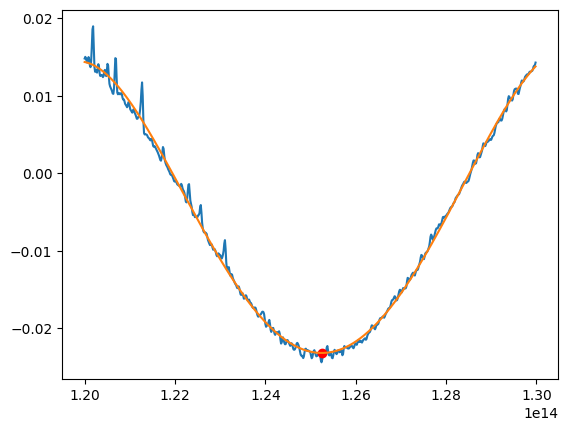

In [7]:
min_frequenz_second, min_absorption_second = fit_individually(1.2e14,1.3e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

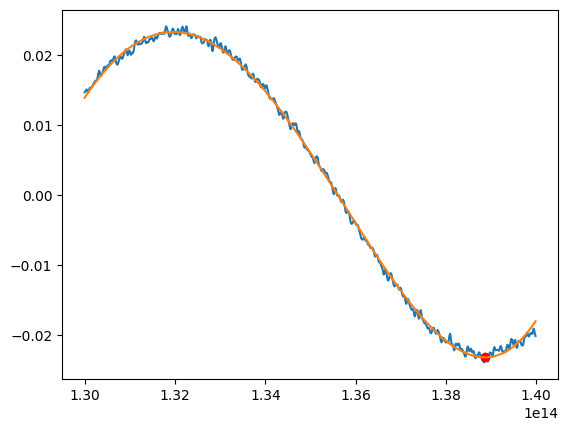

In [8]:
min_frequenz_third, min_absorption_third = fit_individually(1.3e14,1.4e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

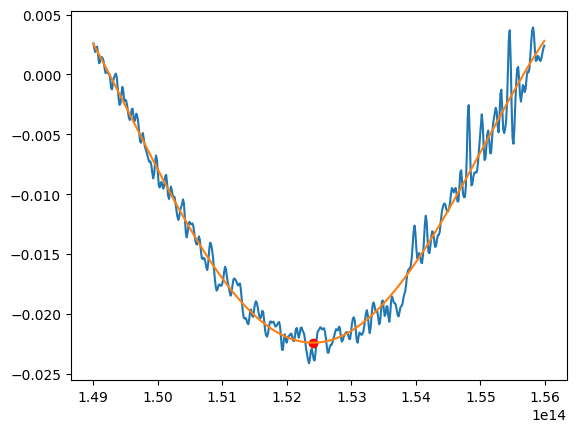

In [9]:
min_frequenz_fourth, min_absorption_fourth = fit_individually(1.49e14,1.56e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

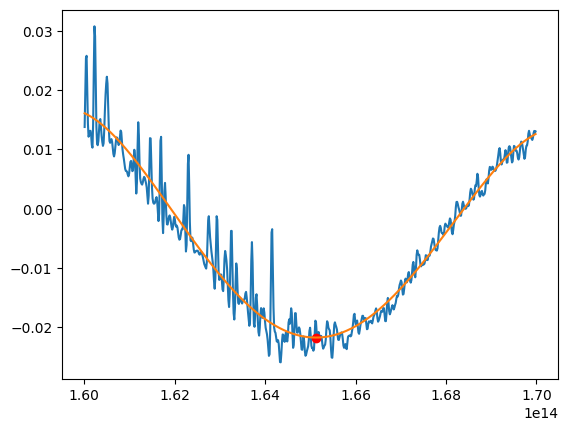

In [10]:
min_frequenz_fifth, min_absorption_fifth = fit_individually(1.6e14,1.7e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

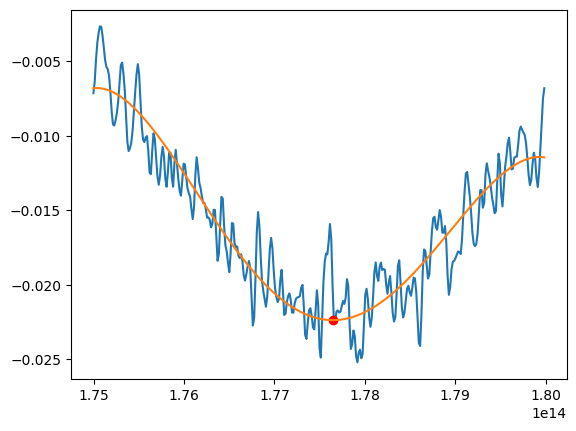

In [11]:
min_frequenz_sixth, min_absorption_sixth = fit_individually(1.75e14,1.8e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

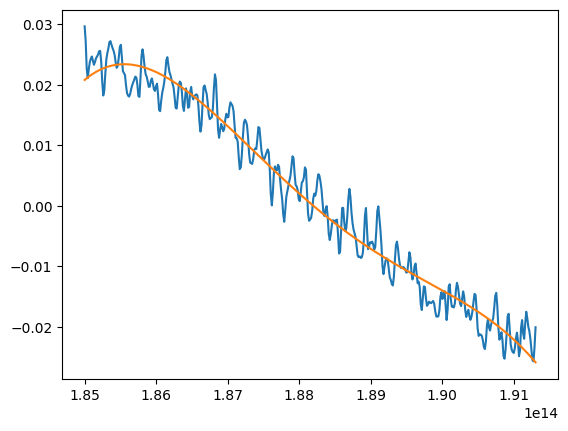

In [12]:
min_frequenz_seventh, min_absorption_seventh = fit_individually(1.85e14,1.95e14,frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge, p0 = [1,1,1,1,1])

In [13]:
min_frequenz_total = [min_frequenz_first[0], min_frequenz_second[0], min_frequenz_third[0], min_frequenz_fourth[0], min_frequenz_fifth[0], min_frequenz_sixth[0]]
min_absorption_total = [min_absorption_first[0], min_absorption_second[0], min_absorption_third[0], min_absorption_fourth[0], min_absorption_fifth[0], min_absorption_sixth[0]]

In [14]:
min_frequenz_total 

[99323047195229.27,
 125241577799862.19,
 138858563726665.16,
 152403272689768.9,
 165124023906950.6,
 177642399505857.47]

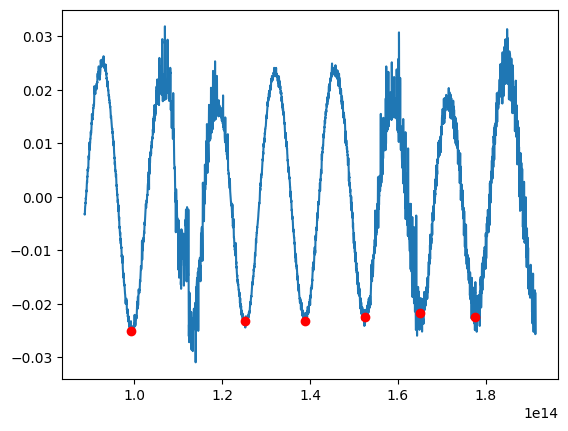

In [15]:
plt.plot(frequenz_20_no_edge,Lumilog_GaN_smoothed_out_no_edge)
plt.plot(min_frequenz_total,min_absorption_total, "ro")

In [16]:
m_array_total = calculate_m(min_frequenz_total)
m_array_total

[3.832124926768624,
 9.197452246267138,
 10.25186765584412,
 11.980681807841716,
 13.190531199700496]

In [17]:
m_array_clean = np.arange(7,14)
m_array_clean = np.delete(m_array_clean, 1)

In [18]:
n_array_total = []
for i in range(0,len(m_array_clean)):
    n_array_total.append(refractive_index(m_array_clean[i],3.5e-6,min_frequenz_total[i]))
n_array_total

[3.449551354647292,
 3.4195907423362986,
 3.3926782861396805,
 3.3721712068884004,
 3.371752994063054,
 3.375235403641515]

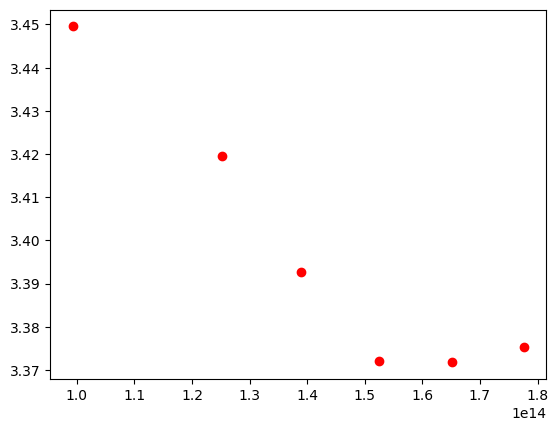

In [19]:
plt.plot(min_frequenz_total,n_array_total, "ro")

In [20]:
params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,min_frequenz_total,n_array_total, p0 = [1,1,1,1,1])

In [21]:
params_fit

array([-1.78548978e+00,  1.52914141e-13, -1.62093224e-27,  7.38244814e-42,
       -1.22875806e-56])

In [22]:
min_frequenz_total

[99323047195229.27,
 125241577799862.19,
 138858563726665.16,
 152403272689768.9,
 165124023906950.6,
 177642399505857.47]

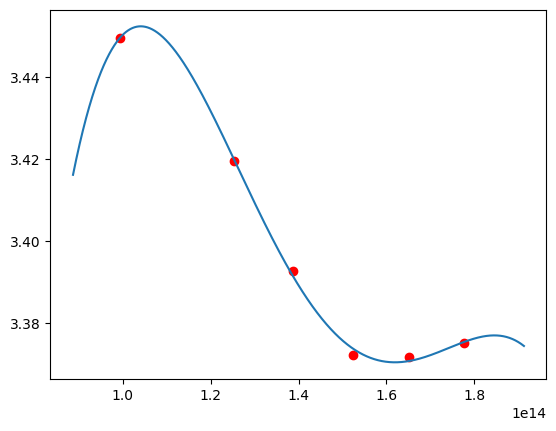

In [23]:
plt.plot(min_frequenz_total,n_array_total, "ro")
plt.plot(frequenz_20_no_edge,polynomial(frequenz_20_no_edge,*params_fit))

### Bei 80C